In [1]:
import pandas as pd
import numpy as np

# Read and explore data

In [2]:
df = pd.read_csv('data/clickdata.csv', delimiter='\u0001')

In [3]:
df.head()

,epoch_ms,session_id,country_by_ip_address,region_by_ip_address,url_without_parameters,referrer_without_parameters,visitor_recognition_type,useragent,ua_device_class,ua_device_name,...,ua_facebook_device_name,ua_facebook_device_version,ua_facebook_operating_system_name,ua_facebook_operating_system_version,ua_hacker_attackVector,ua_hacker_toolkit,ua_ie_compatibility_version_major,ua_ie_compatibility_name_version_major,ua_carrier,ua_agent_class
0,1520280001034,be73c8d1b836170a21529a1b23140f8e,US,CA,https://www.bol.com/nl/l/nederlandstalige-kuns...,NaN,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot
1,1520280001590,c24c6637ed7dcbe19ad64056184212a7,US,CA,https://www.bol.com/nl/l/italiaans-natuur-wete...,NaN,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot
2,1520280002397,ee391655f5680a7bfae0019450aed396,IT,LI,https://www.bol.com/nl/p/nespresso-magimix-ini...,https://www.bol.com/nl/p/nespresso-magimix-ini...,ANONYMOUS,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47....,Desktop,Linux Desktop,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Browser
3,1520280002598,f8c8a696dd37ca88233b2df096afa97f,US,CA,https://www.bol.com/nl/l/nieuwe-engelstalige-o...,NaN,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot
4,1520280004428,f8b0c06747b7dd1d53c0932306bd04d6,US,CA,https://www.bol.com/nl/l/nieuwe-actie-avontuur...,NaN,ANONYMOUS,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,Robot Mobile,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot Mobile


Each row in 'df' contains a page request in a session.

CSV column definitions:
* epoch_ms: epoch in milliseconds
* session_id: session identifier
* country_by_ip_address: estimated country based on GeoIP lookup
* region_by_ip_address: estimated region based on GeoIP lookup
* url_without_parameters: 
* referrer_without_parameters: 
* visitor_recognition_type: ANONYMOUS, RECOGNIZED (by cookie) or LOGGEDIN
* useragent: the useragent string sent by the webbrowser
* ua_... : we've parsed the useragent field (with yauaa) and expose it as ua_.... see https://github.com/nielsbasjes/yauaa#values-explained
* ua_agent_class: the class determined by yauaa


In [4]:
# clean up different types of missing values
df = df.replace(np.nan, '', regex=True)
df = df.replace('Unknown', '', regex=True)

## Label data using our 3 classes

In [5]:
crawlers = pd.read_csv('labeled_web_crawlers_augmented.csv', delimiter='\t')
crawlers

,count,name,type,info
0,18123,Googlebot,NHT-search,NaN
1,1032,AdsBot-Google-Mobile,NHT-other,NaN
2,670,Mediapartners-Google,NHT-other,NaN
3,234,Sogou web spider,NHT-search,NaN
4,208,Bingbot,NHT-search,NaN
5,171,Applebot,NHT-other,NaN
6,65,facebookexternalhit,NHT-other,NaN
7,48,WhatsApp,NHT-other,NaN
8,34,UptimeRobot,NHT-other,NaN
9,33,Pinterestbot,NHT-other,NaN


In [6]:
def trafficType(dfRow): 
    for i, crawler in crawlers.iterrows():
        if (dfRow['useragent'].find(crawler['name']) >= 0) & (dfRow['ua_agent_class'] != 'Hacker'):
            return crawler['type']
    #no crawler? return human
    return 'HT'

In [7]:
%time df['traffic_type'] = df[['useragent', 'ua_agent_class']].apply (lambda row: trafficType (row),axis=1)

CPU times: user 1min 15s, sys: 7.64 ms, total: 1min 15s
Wall time: 1min 15s


# Train a model

In [8]:
import pandas as pd
# select a few columns and transform them into features
X = pd.get_dummies(data=df[['ua_agent_name', 'ua_agent_version_major']], drop_first=True)
y = df['traffic_type']

In [9]:
# naively split the data and train a model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# pick an existing classifier algorithm
from sklearn.ensemble import RandomForestClassifier
my_classifier = RandomForestClassifier()

In [11]:
%time my_classifier.fit(X_train, y_train)

CPU times: user 934 ms, sys: 36 ms, total: 970 ms
Wall time: 193 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Evaluate the model

In [12]:
# model score
%time my_classifier.score(X_test, y_test)

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 32.6 ms


1.0

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = my_classifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

In [14]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[9957    0    0]
 [   0  414    0]
 [   0    0 4575]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


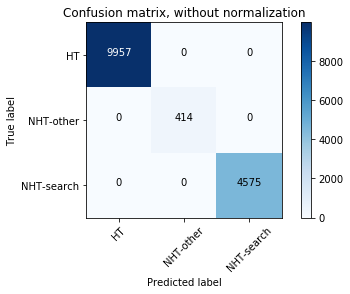

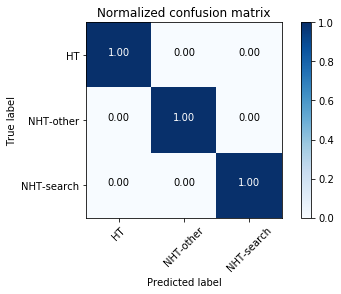

In [15]:
class_names = my_classifier.classes_
np.set_printoptions(precision=4)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


# Predict a single element

In [19]:
# predict an individual data record
y_pred = my_classifier.predict([X_test.iloc[42]])[0]
y_real = y_test.iloc[42]
print(y_pred)
print(y_real)

NHT-search
NHT-search
